In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-products/amazon_product.csv


In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Load the dataset
file_path = '/kaggle/input/amazon-products/amazon_product.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()


,Unnamed: 0,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,...,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations,product_availability,unit_price,unit_count
0,0,B0BQ118F2T,Moto G Play 2023 3-Day Battery Unlocked Made f...,$99.99,$169.99,USD,4.0,2929,https://www.amazon.com/dp/B0BQ118F2T,https://m.media-amazon.com/images/I/61K1Fz5Lxv...,...,False,False,True,False,6K+ bought in past month,"FREE delivery Tue, Aug 6",True,NaN,NaN,NaN
1,1,B0CTD47P22,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",$149.74,$158.00,USD,4.2,135,https://www.amazon.com/dp/B0CTD47P22,https://m.media-amazon.com/images/I/51QhB2CfqS...,...,False,False,True,False,3K+ bought in past month,"FREE delivery Wed, Aug 7 Only 7 left in stock ...",False,Only 7 left in stock - order soon.,NaN,NaN
2,2,B0CHH6X6H2,Total by Verizon | Samsung Galaxy A03s | Locke...,$49.88,NaN,USD,3.9,205,https://www.amazon.com/dp/B0CHH6X6H2,https://m.media-amazon.com/images/I/812woqv69C...,...,False,False,True,False,2K+ bought in past month,"FREE delivery Tue, Aug 6",False,NaN,NaN,NaN
3,3,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...,$335.00,$499.00,USD,4.3,2248,https://www.amazon.com/dp/B0BZ9XNBRB,https://m.media-amazon.com/images/I/61r7cCpQPl...,...,False,False,False,False,10K+ bought in past month,FREE delivery Aug 6 - 8,True,NaN,NaN,NaN
4,4,B0CN1QSH8Q,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",$199.99,NaN,USD,4.1,423,https://www.amazon.com/dp/B0CN1QSH8Q,https://m.media-amazon.com/images/I/61s0ZzwzSC...,...,False,False,True,True,3K+ bought in past month,"FREE delivery Tue, Aug 6",True,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   64 non-null     int64  
 1   asin                         64 non-null     object 
 2   product_title                64 non-null     object 
 3   product_price                64 non-null     object 
 4   product_original_price       27 non-null     object 
 5   currency                     64 non-null     object 
 6   product_star_rating          54 non-null     float64
 7   product_num_ratings          64 non-null     int64  
 8   product_url                  64 non-null     object 
 9   product_photo                64 non-null     object 
 10  product_num_offers           64 non-null     int64  
 11  product_minimum_offer_price  64 non-null     object 
 12  is_best_seller               64 non-null     bool   
 13  is_amazon_choice      

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [8]:
# Convert price columns to numeric values
df['product_price'] = df['product_price'].str.replace('$', '').str.replace(',', '').astype(float)
df['product_original_price'] = df['product_original_price'].str.replace('$', '').str.replace(',', '').astype(float)
df['product_minimum_offer_price'] = df['product_minimum_offer_price'].str.replace('$', '').str.replace(',', '').astype(float)
df['unit_price'] = df['unit_price'].str.replace('$', '').str.replace(',', '').astype(float)

In [9]:
df.describe()


,product_price,product_original_price,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,unit_price,unit_count
count,64.000000,27.000000,54.000000,6.400000e+01,64.000000,64.000000,5.000000,5.000000
mean,55.983906,129.387778,4.244444,5.210164e+04,4.859375,48.813125,1.056000,15.200000
std,91.710499,166.997257,0.558187,1.576855e+05,8.145243,76.338285,0.853803,25.390943
min,0.000000,3.990000,1.800000,0.000000e+00,1.000000,0.000000,0.250000,0.000000
25%,1.915000,27.995000,4.100000,4.775000e+01,1.000000,1.915000,0.480000,2.000000
50%,23.085000,56.950000,4.400000,9.675000e+02,1.000000,21.680000,0.590000,3.000000
75%,61.812500,153.995000,4.600000,1.384625e+04,4.000000,56.990000,1.910000,11.000000
max,499.000000,699.000000,4.800000,1.015448e+06,34.000000,409.990000,2.050000,60.000000


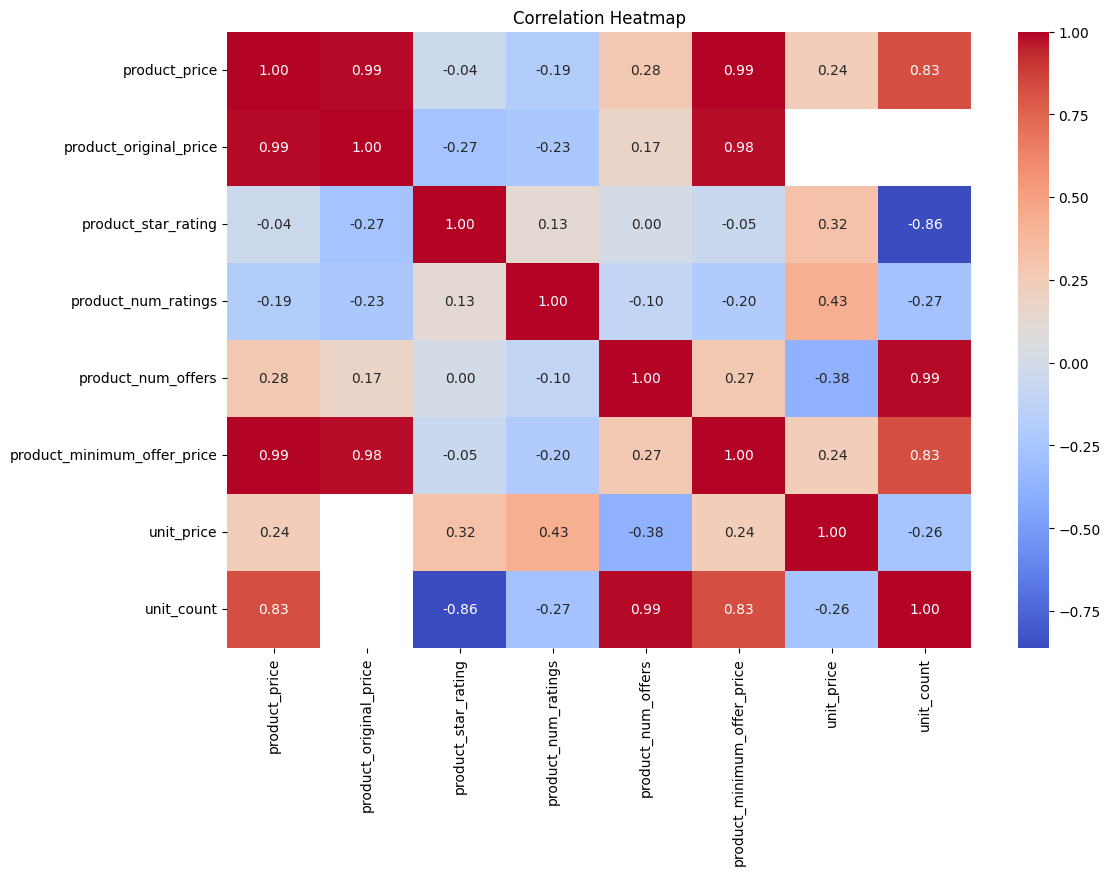

In [10]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

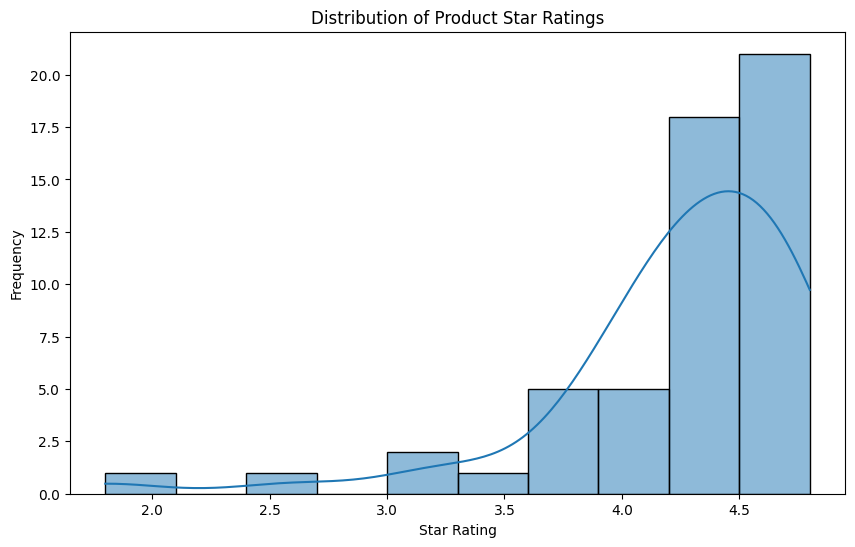

In [11]:
# Distribution of product star ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['product_star_rating'].dropna(), bins=10, kde=True)
plt.title('Distribution of Product Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

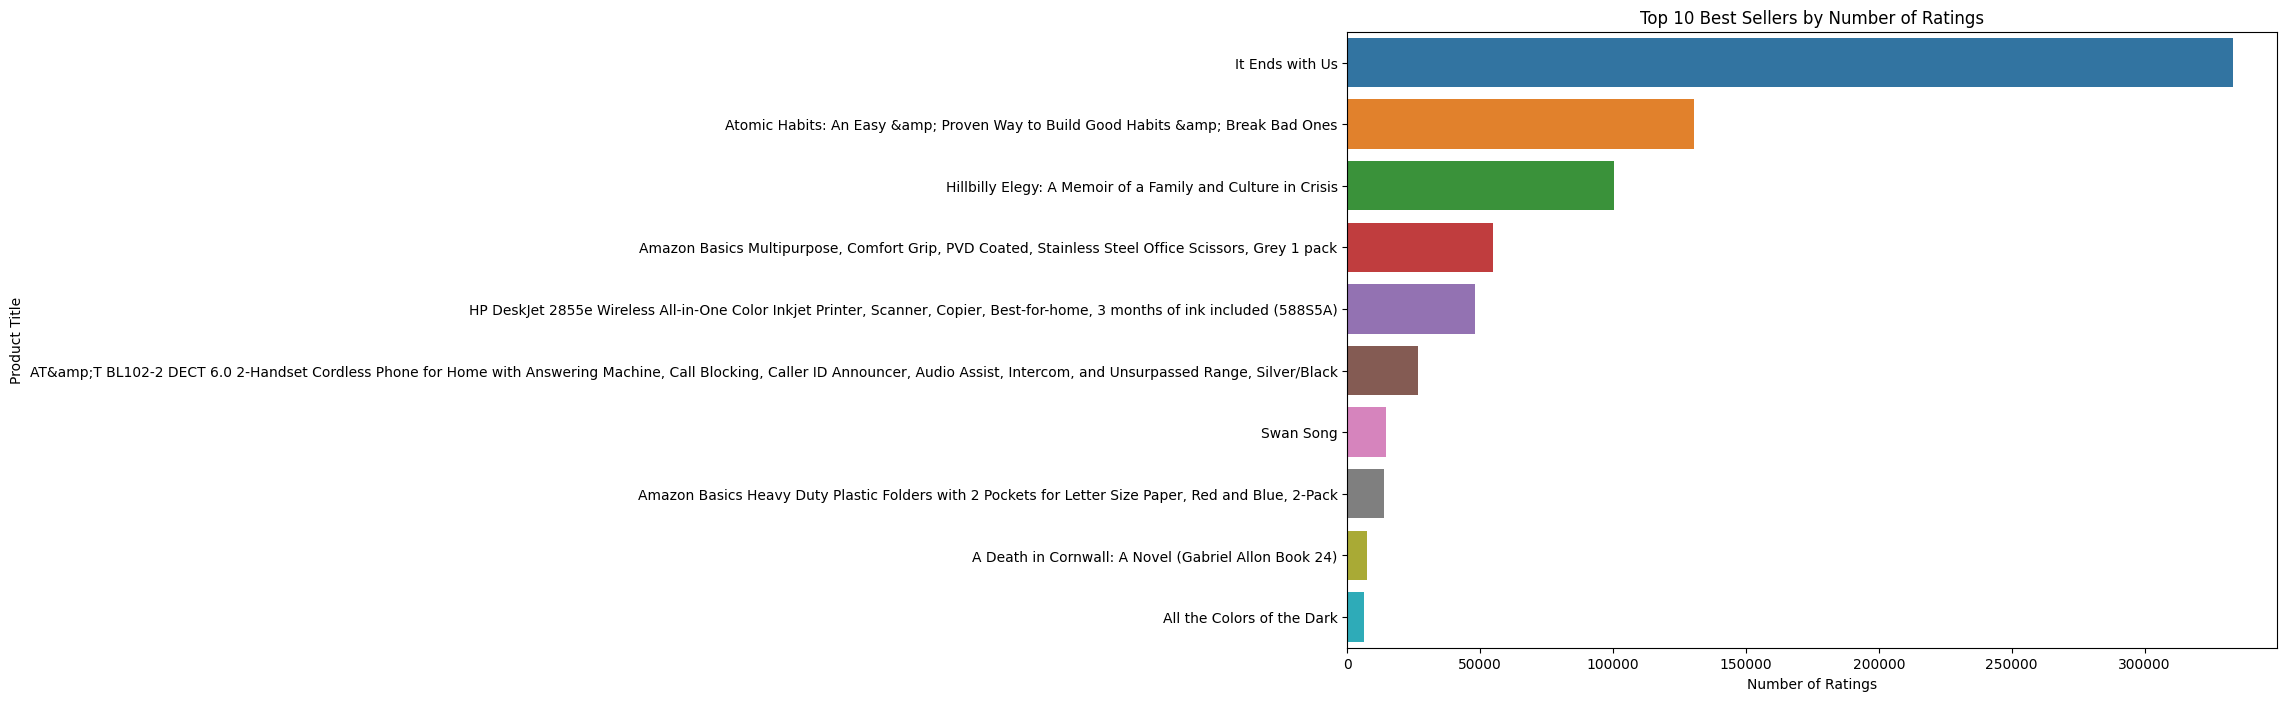

In [12]:
# Top 10 best sellers
best_sellers = df[df['is_best_seller']].nlargest(10, 'product_num_ratings')
plt.figure(figsize=(12, 8))
sns.barplot(x='product_num_ratings', y='product_title', data=best_sellers)
plt.title('Top 10 Best Sellers by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Product Title')
plt.show()

In [13]:
# Prepare the data for prediction
features = ['product_price', 'product_star_rating', 'product_num_ratings', 'product_num_offers', 'product_minimum_offer_price', 'is_amazon_choice', 'is_prime', 'climate_pledge_friendly', 'has_variations']
X = df[features].dropna()
y = df.loc[X.index, 'is_best_seller']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.7272727272727273,
 array([[6, 2],
        [1, 2]]),
 '              precision    recall  f1-score   support\n\n       False       0.86      0.75      0.80         8\n        True       0.50      0.67      0.57         3\n\n    accuracy                           0.73        11\n   macro avg       0.68      0.71      0.69        11\nweighted avg       0.76      0.73      0.74        11\n')